# 1. pivoting

In [2]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Teacher Ferdin/fishdata.csv', encoding = 'unicode_escape',header = None)
df.head()

C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,0,1,2,3,4,5,6,7,8,9,10,11
0,2020.0,6.0,18,14,30.0,33.0,qCBrs9ï¿½ ï¿½R! ï¿½ï¿½ï¿½ï¿½cï¿½ï¿½Fï¿½Initial...,NaN,NaN,NaN,NaN,NaN
1,2020.0,6.0,18,14,30.0,43.0,201,25.0,29.0,95.0,27.19,4.39
2,2020.0,6.0,18,14,30.0,48.0,201,25.0,29.0,95.0,27.19,4.38
3,2020.0,6.0,18,14,31.0,3.0,201,25.0,29.0,95.0,27.19,4.38
4,2020.0,6.0,18,14,31.0,8.0,201,25.0,29.0,95.0,27.19,4.41


In [3]:
column_names = ['Year','Month','Day','Hour','Minute','Second','Carbon_Monoxide','PM_2.5','External_Temperature','Humidity','Internal_Temperature',' ']
df.columns = column_names

df.drop(index = df.index[0], inplace = True)
df.head()

,Year,Month,Day,Hour,Minute,Second,Carbon_Monoxide,PM_2.5,External_Temperature,Humidity,Internal_Temperature,
1,2020.0,6.0,18,14,30.0,43.0,201,25.0,29.0,95.0,27.19,4.39
2,2020.0,6.0,18,14,30.0,48.0,201,25.0,29.0,95.0,27.19,4.38
3,2020.0,6.0,18,14,31.0,3.0,201,25.0,29.0,95.0,27.19,4.38
4,2020.0,6.0,18,14,31.0,8.0,201,25.0,29.0,95.0,27.19,4.41
5,2020.0,6.0,18,14,31.0,13.0,201,25.0,29.0,95.0,27.25,4.41


In [18]:
df.dtypes

Year                    float64
Month                   float64
Day                       int64
Hour                      int64
Minute                  float64
Second                  float64
Carbon_Monoxide          object
PM_2.5                  float64
External_Temperature    float64
Humidity                float64
Internal_Temperature    float64
                        float64
dtype: object

In [19]:
df1 = df.astype({'Year':'int64',
                'Month': 'int64',
                'Minute':'int64',
                'Second':'int64'})
df['Carbon_Monoxide'] = df['Carbon_Monoxide'].apply(pd.to_numeric, errors='coerce')

In [20]:
pivot_cols = ['Month','External_Temperature','Internal_Temperature','Humidity','Carbon_Monoxide']
pivot_df = df[pivot_cols]
pivot_df.head()

,Month,External_Temperature,Internal_Temperature,Humidity,Carbon_Monoxide
1,6.0,29.0,27.19,95.0,201.0
2,6.0,29.0,27.19,95.0,201.0
3,6.0,29.0,27.19,95.0,201.0
4,6.0,29.0,27.19,95.0,201.0
5,6.0,29.0,27.25,95.0,201.0


In [21]:
pivot_table = pd.pivot_table(pivot_df,index = 'Month', 
                             values = ['External_Temperature','Internal_Temperature','Humidity','Carbon_Monoxide'], 
                             aggfunc=np.mean)
pivot_table.head()

,Carbon_Monoxide,External_Temperature,Humidity,Internal_Temperature
Month,,,,
-1912020.0,24.0,-183.0,30.0,95.0
-1172020.0,42.0,-30.0,31.0,95.0
-232020.0,0.0,-23.0,28.0,95.0
-202020.0,34.0,-63.0,31.0,95.0
-122020.0,58.0,-27.0,32.0,95.0


In [22]:
pivot_df.describe()

,Month,External_Temperature,Internal_Temperature,Humidity,Carbon_Monoxide
count,8.119460e+05,811851.000000,811843.000000,811843.000000,810195.000000
mean,2.617098e+00,30.827049,28.486738,94.627387,212.696645
std,2.519275e+03,5.682789,2.600313,5.387394,52.229390
min,-1.912020e+06,-999.000000,2.970000,-999.000000,-183.000000
25%,7.000000e+00,29.000000,27.060000,95.000000,183.000000
50%,7.000000e+00,30.000000,28.250000,95.000000,198.000000
75%,8.000000e+00,32.000000,30.250000,95.000000,244.000000
max,2.020000e+03,310.000000,95.000000,95.000000,334.000000


In [23]:
pivot_df.isnull().sum()

Month                      0
External_Temperature      95
Internal_Temperature     103
Humidity                 103
Carbon_Monoxide         1751
dtype: int64

In [24]:
pivot_df.shape

(811946, 5)

In [25]:
pivot_df.dropna().shape

(810164, 5)

In [1]:
#removing irregular month
pivot_df.drop(pivot_df[pivot_df['Month'] < 0].index, inplace = True)
pivot_df.drop(pivot_df[pivot_df['Month'] > 12].index, inplace = True)

#removing irregular external temperature
pivot_df.drop(pivot_df[pivot_df['External_Temperature'] < 0].index, inplace = True)

#removing irregularities in humidity
pivot_df.drop(pivot_df[pivot_df['Humidity'] < 0].index, inplace = True)

NameError: name 'pivot_df' is not defined

In [27]:
new_pivot_table = pd.pivot_table(pivot_df,index = 'Month', 
                             values = ['External_Temperature','Internal_Temperature','Humidity','Carbon_Monoxide'], 
                             aggfunc=np.mean)
new_pivot_table.head()

,Carbon_Monoxide,External_Temperature,Humidity,Internal_Temperature
Month,,,,
6.0,263.695942,29.523070,95.000000,28.768610
7.0,214.589750,31.784893,94.679568,29.164226
8.0,170.644520,31.439748,94.445248,28.217644
9.0,181.894307,29.370660,94.230240,26.458460
10.0,182.701963,28.678679,94.234710,26.327375


<AxesSubplot:ylabel='Frequency'>

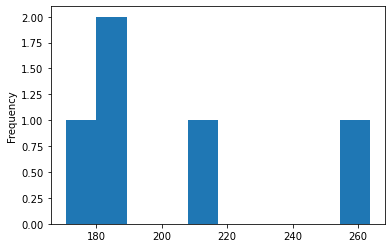

In [28]:
new_pivot_table['Carbon_Monoxide'].plot(kind = 'hist')

# Binning

In [29]:
#qcut()
pivot_df['Carbon_Monoxide_levels'] = pd.qcut(pivot_df['Carbon_Monoxide'], q=4)
pivot_df

<ipython-input-29-a896ce0573ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_df['Carbon_Monoxide_levels'] = pd.qcut(pivot_df['Carbon_Monoxide'], q=4)


,Month,External_Temperature,Internal_Temperature,Humidity,Carbon_Monoxide,Carbon_Monoxide_levels
1,6.0,29.0,27.19,95.00,201.0,"(198.0, 244.0]"
2,6.0,29.0,27.19,95.00,201.0,"(198.0, 244.0]"
3,6.0,29.0,27.19,95.00,201.0,"(198.0, 244.0]"
4,6.0,29.0,27.19,95.00,201.0,"(198.0, 244.0]"
5,6.0,29.0,27.25,95.00,201.0,"(198.0, 244.0]"
...,...,...,...,...,...,...
811942,10.0,25.0,25.94,95.00,201.0,"(198.0, 244.0]"
811943,10.0,25.0,25.94,95.00,201.0,"(198.0, 244.0]"
811944,10.0,95.0,4.18,25.94,-168.0,"(-183.001, 183.0]"
811945,10.0,25.0,25.94,95.00,201.0,"(198.0, 244.0]"


In [30]:
pivot_df['Carbon_Monoxide_levels'].value_counts()

(-183.001, 183.0]    205492
(198.0, 244.0]       202651
(244.0, 334.0]       202336
(183.0, 198.0]       199676
Name: Carbon_Monoxide_levels, dtype: int64

In [31]:
#cut
cut_labels = ['Cold', 'Cool', 'Warm','Hot']
cut_bins = [0, 4, 15, 25, 35]
pivot_df['ExternalTemp_levels'] = pd.cut(pivot_df['External_Temperature'], bins=cut_bins, labels=cut_labels)

<ipython-input-31-18854fcbd3dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_df['ExternalTemp_levels'] = pd.cut(pivot_df['External_Temperature'], bins=cut_bins, labels=cut_labels)


In [32]:
pivot_df

,Month,External_Temperature,Internal_Temperature,Humidity,Carbon_Monoxide,Carbon_Monoxide_levels,ExternalTemp_levels
1,6.0,29.0,27.19,95.00,201.0,"(198.0, 244.0]",Hot
2,6.0,29.0,27.19,95.00,201.0,"(198.0, 244.0]",Hot
3,6.0,29.0,27.19,95.00,201.0,"(198.0, 244.0]",Hot
4,6.0,29.0,27.19,95.00,201.0,"(198.0, 244.0]",Hot
5,6.0,29.0,27.25,95.00,201.0,"(198.0, 244.0]",Hot
...,...,...,...,...,...,...,...
811942,10.0,25.0,25.94,95.00,201.0,"(198.0, 244.0]",Warm
811943,10.0,25.0,25.94,95.00,201.0,"(198.0, 244.0]",Warm
811944,10.0,95.0,4.18,25.94,-168.0,"(-183.001, 183.0]",NaN
811945,10.0,25.0,25.94,95.00,201.0,"(198.0, 244.0]",Warm


In [33]:
labels = ['low', 'medium', 'high','very high']
pivot_df['Carbon_Monoxide_labels'] = pd.qcut(pivot_df['Carbon_Monoxide'], q=4, labels=labels)

<ipython-input-33-92236283b5e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_df['Carbon_Monoxide_labels'] = pd.qcut(pivot_df['Carbon_Monoxide'], q=4, labels=labels)


In [34]:
pivot_df

,Month,External_Temperature,Internal_Temperature,Humidity,Carbon_Monoxide,Carbon_Monoxide_levels,ExternalTemp_levels,Carbon_Monoxide_labels
1,6.0,29.0,27.19,95.00,201.0,"(198.0, 244.0]",Hot,high
2,6.0,29.0,27.19,95.00,201.0,"(198.0, 244.0]",Hot,high
3,6.0,29.0,27.19,95.00,201.0,"(198.0, 244.0]",Hot,high
4,6.0,29.0,27.19,95.00,201.0,"(198.0, 244.0]",Hot,high
5,6.0,29.0,27.25,95.00,201.0,"(198.0, 244.0]",Hot,high
...,...,...,...,...,...,...,...,...
811942,10.0,25.0,25.94,95.00,201.0,"(198.0, 244.0]",Warm,high
811943,10.0,25.0,25.94,95.00,201.0,"(198.0, 244.0]",Warm,high
811944,10.0,95.0,4.18,25.94,-168.0,"(-183.001, 183.0]",NaN,low
811945,10.0,25.0,25.94,95.00,201.0,"(198.0, 244.0]",Warm,high
